In [1]:
%plot --format svg

In [2]:
setdefaults

## UConn Hackathon Mar 24-25

[https://www.hackuconn.org/](https://www.hackuconn.org/)

# Final Project

1. Will be a team project (select team of 2-3 students)

2. You will create a repository and each of you will contribute code and documentation

3. If you have an idea feel free to suggest it, otherwise I will come up with a project, possible topics include:

    a. Conduction of heat through simple geometry
    
    b. Plate or beam mechanics (1-D and 2-D geometries)
    
    c. 


# Eigenvalues

Eigenvalues and eigen vectors are the solution to the set of equations where

$Ax=\lambda x$

or 

$A-I \lambda=0$

Where A is the description of the system and I is the identity matrix with the same dimensions as A and $\lambda$ is an eigenvalue of A. 

These problems are seen in a number of engineering practices:

1. Determining vibrational modes in structural devices

2. Material science - vibrational modes of crystal lattices (phonons)

3. [Google searches - http://www.rose-hulman.edu/~bryan/googleFinalVersionFixed.pdf](http://www.rose-hulman.edu/~bryan/googleFinalVersionFixed.pdf)

4. Quantum mechanics - many solutions are eigenvalue problems

5. Solid mechanics, principle stresses and principle stress directions are eigenvalues and eigenvectors

One way of determining the eigenvalues is taking the determinant:

$|A-\lambda I|=0$

This will result in an $n^{th}$-order polynomial where A is $n \times n$.

Take, A

$A=\left[\begin{array}{ccc}
2 & 1 & 0 \\
1 & 3 & 1 \\
0 & 1 & 4 \end{array}\right]$

$|A-\lambda I| = \left|\begin{array}{ccc}
2-\lambda & 1 & 0 \\
1 & 3-\lambda & 1 \\
0 & 1 & 4-\lambda \end{array}\right|=0$

$(2-\lambda)(3-\lambda)(4-\lambda)-(4-\lambda)-(2-\lambda)=0$

$-\lambda^{3}+9\lambda^{2}-24\lambda+18 =0$

$\lambda = 3,~\sqrt{3}+3,-\sqrt{3}+3$

in Matlab/Octave:

```matlab
A=[2,1,0;1,3,1;0,1,4];
pA=poly(A);
lambda = roots(pA)
```



In [3]:
A=[2,1,0;1,3,1;0,1,4];
pA=poly(A); % characteristic polynomial of A, e.g. l^3-9*l^2+24*l-18=0
lambda = roots(pA)

lambda =

   4.7321
   3.0000
   1.2679



## Applications of Eigenvalue analysis

Consider the 2-mass, 3-spring system shown below

![masses and springs in series](springs_masses.png)

It might not be immediately obvious, but there are two resonant frequencies for these masses connected in series. 

Take the two FBD solutions:

$m_{1}\frac{d^{2}x_{1}}{dt^{2}}=-kx_{1}+k(x_{2}-x_{1})$

$m_{2}\frac{d^{2}x_{2}}{dt^{2}}=-k(x_{2}-x_{1})-kx_{2}$

we know that $x_{i}(t)\propto sin(\omega t)$ so we can substitute

$x_{i}=X_{i}sin(\omega t)$

$-m_{1}X_{1}\omega^{2}sin(\omega t) = -kX_{1}sin(\omega t) +k(X_{2}-X_{1})sin(\omega t)$

$-m_{2}X_{2}\omega^{2}sin(\omega t) = -kX_{2}sin(\omega t) - k(X_{2}-X_{1})sin(\omega t)$

where $X_{1}$ and $X_{2}$ are the amplitude of oscillations and $\omega$ is the frequency of oscillations. 

now, 

$\left(\frac{2k}{m_{1}}-\omega^{2}\right)X_{1}-\frac{k}{m_{1}}X_{2} = 0$


$-\frac{k}{m_{2}}X_{1}+\left(\frac{2k}{m_{2}}-\omega^{2}\right)X_{2} = 0$

or

$|K-\lambda I| = \left|\begin{array}{cc}
\left(\frac{2k}{m_{1}}-\omega^{2}\right) & -\frac{k}{m_{1}} \\
-\frac{k}{m_{2}} & \left(\frac{2k}{m_{2}}-\omega^{2}\right)
\end{array}\right|=0$

where $\lambda = \omega^{2}$


In [4]:
help eig

'eig' is a built-in function from the file libinterp/corefcn/eig.cc

 -- Built-in Function: LAMBDA = eig (A)
 -- Built-in Function: LAMBDA = eig (A, B)
 -- Built-in Function: [V, LAMBDA] = eig (A)
 -- Built-in Function: [V, LAMBDA] = eig (A, B)
     Compute the eigenvalues (and optionally the eigenvectors) of a
     matrix or a pair of matrices

     The algorithm used depends on whether there are one or two input
     matrices, if they are real or complex, and if they are symmetric
     (Hermitian if complex) or non-symmetric.

     The eigenvalues returned by 'eig' are not ordered.

     See also: eigs, svd.

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.


In [5]:
m=40; % mass in kg
k=200; % spring constant in N/m

K=[2*k/m,-k/m;-k/m,2*k/m]

[v,e]=eig(K)

K =

   10   -5
   -5   10

v =

  -0.70711  -0.70711
  -0.70711   0.70711

e =

Diagonal Matrix

    5    0
    0   15



In [6]:
K*v(:,2)
e(2,2)*v(:,2)

ans =

  -10.607
   10.607

ans =

  -10.607
   10.607



### $m_{1}=m_{2}=$40 kg and $k_{1}=k_{2}=k_{3}=$200 N/m
![animation](./eig_200_40.gif)

### $m_{1}=$40 kg, $m_{2}=$50 kg, $k_{1}=$200 N/m, and $k_{2}=k_{3}=$100 N/m
![animation](./eig_200_100_40_50.gif)

## Solid Mechanics

Many times you want to know the "principle" components of stress or strain. 

stress and strain are second order tensors:

$\sigma_{ij} =\frac{F_{i}}{A_{j}}$ (engineering stress)

$\epsilon_{ij}=\frac{\Delta l_{i}}{l_{j}}$ (engineering strain)

Imagine you can apply a force in two directions normal to each other, could you create a shear stress? 

![Desired stress state and with unknown applied stresses](stress.svg)

Let's try to create the stress state of 10 MPa shear stress with two normal stresses. 

that means, $\sigma_{12}=\sigma_{21}=$10 MPa, and $\sigma_{11}=\sigma_{22}=\sigma_{33}=\sigma_{23}=\sigma_{13}=0$ MPa

in matrix form:

$[\sigma]=\left[\begin{array}{ccc}
0 & 10 & 0 \\
10 & 0 & 0 \\
0 & 0 & 0 \end{array} \right]$ MPa

In [8]:
s=[0,10,0;10,0,0;0,0,0];
[v,e]=eig(s)
v1=s*v(:,1)
v2=s*v(:,3)

v =

  -0.70711   0.00000   0.70711
   0.70711   0.00000   0.70711
   0.00000   1.00000   0.00000

e =

Diagonal Matrix

  -10    0    0
    0    0    0
    0    0   10

v1 =

   7.07107
  -7.07107
   0.00000

v2 =

   7.07107
   7.07107
   0.00000



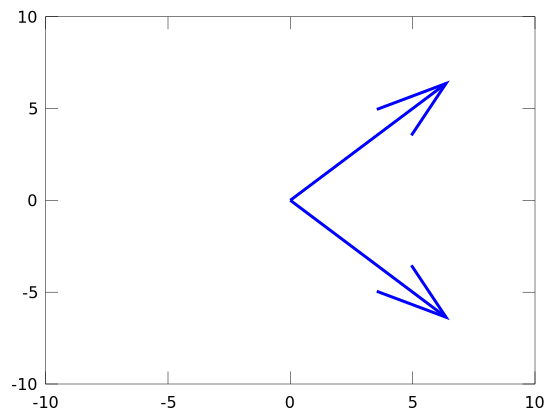

In [9]:
v1=s*v(:,1);
v2=s*v(:,3);
%quiver([0,0],[0,0],v(1,[1,3]),v(2,[1,3]))
quiver([0,0],[0,0],[v1(1),v2(1)],[v1(2),v2(2)])
axis([-10,10,-10,10])

![solution to principle stresses](stress_soln.svg)

In [10]:
e=eig(s)

e =

  -10
    0
   10

